<h1 align="center">Churn prediction Beta Bank- Supervised Learning</h1>

Los clientes de Beta Bank se están yendo poco a poco cada mes. Los banqueros han descubierto que es más rentable retener a los clientes existentes que atraer nuevos. Por lo tanto, es necesario predecir si un cliente dejará el banco en el corto plazo. Para ello, se cuenta con datos sobre el comportamiento pasado de los clientes y la finalización de sus contratos con el banco.

El objetivo es crear un modelo con el mayor valor *F1* posible, con un valor mínimo requerido de *F1* de 0.59. Además, se debe medir la métrica *AUC-ROC* y compararla con el valor *F1*.

## Instrucciones del Proyecto

1. Descargar y preparar los datos, explicando el procedimiento utilizado.
2. Examinar el equilibrio de clases y entrenar el modelo sin tener en cuenta el desequilibrio, describiendo brevemente los hallazgos.
3. Mejorar la calidad del modelo utilizando al menos dos enfoques para corregir el desequilibrio de clases. Se deben usar conjuntos de entrenamiento y validación para encontrar el mejor modelo y conjunto de parámetros. Entrenar diferentes modelos en estos conjuntos y seleccionar el mejor, describiendo brevemente los hallazgos.
4. Realizar la prueba final.

## Diccionario de datos

Los datos están disponibles en el directorio: `./datasets/Churn.csv`.

**Características**

- *RowNumber*: Índice de cadena de datos.
- *CustomerId*: Identificador único del cliente.
- *Surname*: Apellido.
- *CreditScore*: Puntaje de crédito.
- *Geography*: País de residencia.
- *Gender*: Sexo.
- *Age*: Edad.
- *Tenure*: Período durante el cual el depósito a plazo fijo de un cliente ha madurado (años).
- *Balance*: Saldo de la cuenta.
- *NumOfProducts*: Número de productos bancarios utilizados por el cliente.
- *HasCrCard*: El cliente tiene una tarjeta de crédito (1 - sí; 0 - no).
- *IsActiveMember*: Actividad del cliente (1 - sí; 0 - no).
- *EstimatedSalary*: Salario estimado.

**Objetivo**

- *Exited*: indica si el cliente se ha ido (1 - sí; 0 - no).

## Contenido <a id='back'></a>

* [Desarrollo del proyecto](#introduction)
* [Examinar el equilibrio de clases y entrenar el modelo sin tener en cuenta el desequilibrio](#first_train)
* [Mejorar la calidad del modelo utilizando al menos dos enfoques para corregir el desequilibrio de clases.](#update_model)
* [Entrenar diferentes modelos](#train_models)
* [Prueba final](#last_test)
* [Conclusión](#end)

## Desarrollo del proyecto <a id="introduction"></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle

In [2]:
# Acceso a los registros del recurso "Churn"

data = pd.read_csv('./datasets/Churn.csv')

In [3]:
# Obtener información general sobre los registros del DataFrame 'churn'

print("\033[1m Muestra aleatoria de filas del DataFrame 'churn':")

display(data.sample(15, random_state=1425))

print("\033[1m Resumen del DataFrame 'churn':\033[0m \n")

data.info()

print("Regristos duplicados: ", data.duplicated().sum())

 Muestra aleatoria de filas del DataFrame 'churn':


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1120,1121,15589358,Stanley,848,Germany,Male,31,4.0,90018.45,2,1,0,193132.98,0
2046,2047,15733429,Chou,520,Germany,Male,34,8.0,120018.86,2,1,1,343.38,0
8085,8086,15656286,Sims,794,France,Male,33,0.0,0.00,2,0,0,178122.71,0
1200,1201,15804602,Boyd,772,Germany,Male,30,6.0,99785.28,2,0,0,197238.03,0
8589,8590,15637829,Sharpe,691,France,Female,34,NaN,0.00,2,0,1,161559.12,0
6863,6864,15765732,Simmons,564,Spain,Female,24,6.0,149592.14,1,1,1,153771.80,0
3746,3747,15804709,Watt,688,Germany,Male,35,5.0,111578.18,1,0,0,166165.93,1
4156,4157,15599452,Conti,605,Germany,Female,43,NaN,125338.80,2,1,0,23970.13,0
8294,8295,15569430,Burrows,704,Spain,Female,36,2.0,175509.80,2,1,0,152039.67,0
5312,5313,15726178,Hardy,712,Spain,Female,48,8.0,0.00,2,1,0,183235.33,0


 Resumen del DataFrame 'churn': 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
Regristos duplicados:  0


**Interpretación**

El DataFrame contiene datos de 10,000 clientes de Beta Bank. Incluye variables como puntaje crediticio, país de residencia, género, edad, saldo de cuenta y estado de retención de clientes, todas ellas con el tipo de dato adecuado. Se ha detectado un pequeño número de valores faltantes en la duración de la tenencia (Tenure) de los depósitos a plazo fijo de los clientes. No se han identificado registros duplicados en el conjunto de datos.

Para los valores ausentes en 'Tenure', se verificará si los datos contienen valores atípicos para determinar si se deben reemplazar con la media o la mediana. Para decidir cuál de estos valores es más representativo, podemos seguir estos pasos:

1. Determinar la presencia de valores atípicos significativos en los datos.
2. Si no hay valores atípicos significativos, calcular la media.
3. Si se identifican valores atípicos significativos, calcular la mediana.
4. Reemplazar los valores faltantes con la media o la mediana, según corresponda.

[Volver a Contenidos](#back)

**Procesamiento de datos**

In [4]:
# Obtener los cuartiles
Q1 = np.nanpercentile(data['Tenure'], 25)
Q3 = np.nanpercentile(data['Tenure'], 75)

# Calular el rango intercuartílico y los valores atípicos
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

print("Max:",data['Tenure'].max())
print("Min:",data['Tenure'].min())

if  data['Tenure'].min() < lower_bound or data['Tenure'].max() > upper_bound:
    print("Usar la mediana para reemplazar los valores ausentes")
else:
    print("Usar la media para reemplazar los valores ausentes")


Límite inferior: -5.5
Límite superior: 14.5
Max: 10.0
Min: 0.0
Usar la media para reemplazar los valores ausentes


**Interpretación**

Dado que no hay valores atípicos significativos, procederemos a reemplazar los valores NaN de 'Tenure' con la media.

In [5]:
# Reemplazar valores ausentes con la media de Tenure

tenure_mean = data['Tenure'].mean()

data['Tenure'] = data['Tenure'].fillna(tenure_mean)

[Volver a Contenidos](#back)

## Examinar el equilibrio de clases y entrenar el modelo sin tener en cuenta el desequilibrio <a id="first_train"></a>

Frecuencia de clases:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

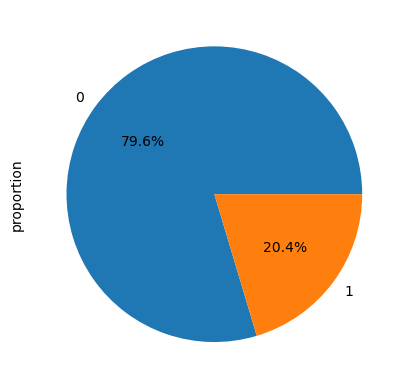

In [6]:
class_freq = data['Exited'].value_counts(normalize=True)

print("Frecuencia de clases:")

print(class_freq)

class_freq.plot(kind='pie', autopct='%1.1f%%') 


**Interpretación**

El análisis de la frecuencia de clases muestra un claro desequilibrio entre las dos clases en el objetivo *Exited*. 

- La clase "0" (clientes que no se han ido) representa aproximadamente el 79.63% de los datos.
- La clase "1" (clientes que se han ido) constituye el 20.37% restante.

Este desequilibrio indica que la mayoría de los clientes han permanecido en el banco, mientras que una minoría ha decidido irse. Tal desbalance puede afectar el rendimiento de los modelos de clasificación, ya que estos tienden a inclinarse hacia la clase mayoritaria. Es probable que un modelo entrenado en este conjunto de datos prediga con mayor frecuencia que un cliente no se irá, simplemente porque esa es la opción más común.

[Volver a Contenidos](#back)

**Entrenamiento del modelo sin tener en cuenta el desequilibrio.**

Al considerar las características para entrenar el modelo de predicción de abandono de clientes, es importante identificar aquellas que son verdaderamente informativas y relevantes para el comportamiento que queremos predecir. En este caso, el apellido del cliente, así como el índice de fila y el identificador único de cliente, considero que no tienen una relación directa con la decisión de un cliente de abandonar el banco. Por lo tanto, incluir estas características en el modelo no solo es innecesario, sino que también puede introducir ruido en el análisis. Es por ello que sería recomendable eliminar estas características antes de entrenar el modelo para garantizar que se utilicen solo las variables significativas y mejorar la precisión del modelo en la predicción del abandono de clientes.

In [7]:
# Entrenar el modelo sin tener en cuenta el desequilibrio. 

features = data.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)

target = data['Exited']


# Codificación de etiquetas

encoder = OrdinalEncoder()

categorical_columns = features.select_dtypes(include=['object']).columns

features_encoder = pd.DataFrame(encoder.fit_transform(features[categorical_columns]),  columns=categorical_columns)

features[categorical_columns] = features_encoder



features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)


# Entrenamiento del modelo

model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)


# Calcular métricas de evaluación

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)


probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print("Métricas de evaluación:")
print("Recall score:", recall)
print("Precision score:", precision)
print("F1 score:", f1)
print("AUC ROC score:", auc_roc)

Métricas de evaluación:
Recall score: 0.4411214953271028
Precision score: 0.7866666666666666
F1 score: 0.5652694610778443
AUC ROC score: 0.8506137785070509


**Interpretación**

Los resultados muestran que el conjunto de datos está desequilibrado, con aproximadamente el 79.6% de los clientes que no han abandonado el banco y el 20.4% abandonándolo. A pesar de este desequilibrio, el modelo logra un puntaje de recall de aproximadamente 0.44, lo que significa que logra identificar correctamente alrededor del 44% de los clientes que realmente abandonaron el banco. Sin embargo, la precisión es alta, alrededor del 78%, lo que indica que de los clientes que el modelo predijo como abandonados, el 78% realmente lo hicieron. El puntaje F1, que combina recall y precisión, es del 56%, lo que indica un equilibrio entre las dos métricas. Esto sugiere que el modelo es capaz de identificar correctamente a algunos de los clientes que abandonaron el banco, pero también puede estar generando falsos positivos. Además, el puntaje AUC ROC es de aproximadamente 0.85, lo que indica un buen rendimiento general del modelo en términos de su capacidad para discriminar entre las clases positiva y negativa.

[Volver a Contenidos](#back)

## Mejorar la calidad del modelo utilizando al menos dos enfoques para corregir el desequilibrio de clases <a id="update_model"> </a>

**Ajuste de peso de clase**

In [8]:
# Equilibrar clases

model = RandomForestClassifier(random_state=12345, class_weight='balanced')

model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)
f1 = f1_score(target_valid, predicted_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)


print("Métricas con el ajuste de clases de 'Ajuste de peso de clase'")
print("Recall score:", recall)
print("Precision score:", precision)
print("F1 score:", f1)
print("AUC ROC score:", auc_roc)

Métricas con el ajuste de clases de 'Ajuste de peso de clase'
Recall score: 0.42990654205607476
Precision score: 0.7876712328767124
F1 score: 0.5562273276904474
AUC ROC score: 0.8525561817792681


**Interpretación**

El ajuste de equilibrio de clases con el 'Ajuste de peso de clase' muestra una precisión más alta, lo que indica una reducción en los falsos positivos, pero un puntaje de recall más bajo en comparación con el sobremuestreo, lo que sugiere una compensación entre la precisión y el recall. Además, ambos modelos logran puntajes AUC ROC similares, lo que indica que tienen un buen rendimiento en la capacidad para discriminar entre las clases positiva y negativa.

**Upsample**

In [9]:
# Sobremuestreo

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

model = RandomForestClassifier(random_state=12345)

model.fit(features_upsampled, target_upsampled)


predicted_valid = model.predict(features_valid)

recall = recall_score(target_valid, predicted_valid)
precision = precision_score(target_valid, predicted_valid)

f1 = f1_score(target_valid, predicted_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("Métricas con el ajuste de clases de 'Sobremuestreo'")
print("Recall score:", recall)
print("Precision score:", precision)
print("F1 score:", f1)
print("AUC ROC score:", auc_roc)

Métricas con el ajuste de clases de 'Sobremuestreo'
Recall score: 0.5439252336448598
Precision score: 0.6928571428571428
F1 score: 0.6094240837696335
AUC ROC score: 0.8415043637487811


**Interpretación**

Los resultados muestran que al corregir el desequilibrio de clases utilizando el enfoque de sobremuestreo se logra mejorar las métricas de evaluación en comparación con el modelo original. Con el ajuste de clases de 'Sobremuestreo', el modelo logra un puntaje de recall de aproximadamente 0.54 y un F1 score de 0.61, lo que indica una mejora en la capacidad para identificar correctamente a los clientes que abandonaron el banco en comparación con el modelo original. Sin embargo, la precisión muestra una ligera disminución en comparación con el modelo original. 

[Volver a Contenidos](#back)

## Entrenar diferentes modelos <a id="train_models"> </a>

In [10]:
# DecisionTreeClassifier

best_score = 0
best_depth = 0
best_model_tree = None
for depth in range(1, 20):
    model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predicted_valid = model_tree.predict(features_valid)
    score = f1_score(target_valid, predicted_valid)
    if score > best_score:
        best_score = score
        best_depth = depth
        best_model_tree = model_tree
print("En el modelo 'DecisionTreeClassifier' se logra la mejor exactitud ({}) con una produndidad de {} nodos".format(best_score, best_depth))


# RandomForestClassifier

best_score_forest = 0
best_depth_forest = 0
best_estimators = 0
best_model_forest = None
for est in range(1, 20):
    for depth in range(1, 20):
        model_forest = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est)
        model_forest.fit(features_upsampled, target_upsampled)
        predicted_valid = model_forest.predict(features_valid)
        score = f1_score(target_valid, predicted_valid)
        if score > best_score_forest:
            best_score_forest = score
            best_depth_forest = depth
            best_estimators = est
            best_model_forest = model_forest
print("En el modelo 'RandomForestClassifier' se logra la mejor exactitud ({}) con un total de {} árboles y una produndidad de {} nodos".format(best_score_forest,best_estimators, best_depth_forest))

  
# LogisticRegression
model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_upsampled, target_upsampled)
predicted_valid = model_regression.predict(features_valid)
score = f1_score(target_valid, predicted_valid)
print("En el modelo 'LogisticRegression' se logra la mejor exactitud ({})".format(score))


En el modelo 'DecisionTreeClassifier' se logra la mejor exactitud (0.5362095531587057) con una produndidad de 14 nodos
En el modelo 'RandomForestClassifier' se logra la mejor exactitud (0.6061814556331007) con un total de 19 árboles y una produndidad de 19 nodos
En el modelo 'LogisticRegression' se logra la mejor exactitud (0.38077769625825386)


**Interpretación**

Después de evaluar varios modelos para encontrar el mejor modelo y los mejores conjuntos de parámetros, se observan resultados variados en términos de exactitud. El modelo 'DecisionTreeClassifier' alcanzó una exactitud máxima de 0.54 con una profundidad de 14 nodos, mientras que el modelo 'RandomForestClassifier' logró una exactitud más alta de 0.61 con un total de 19 árboles y una profundidad de 19 nodos. Por otro lado, el modelo 'LogisticRegression' mostró una exactitud más baja de 0.38. Estos hallazgos sugieren que el modelo 'RandomForestClassifier' es el más prometedor, seguido por 'DecisionTreeClassifier', mientras que 'LogisticRegression' puede no ser la mejor opción para este conjunto de datos.

[Volver a Contenidos](#back)

## Prueba final <a id="last_test"> </a>

In [11]:
# Modelo: RandomForestClassifier
# max_depth: 19
# n_estimators: 19
model_forest = RandomForestClassifier(random_state=12345, max_depth=19, n_estimators=19)
model_forest.fit(features_upsampled, target_upsampled)

predicted_valid = model_forest.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("F1 score:", f1)
print("AUC ROC score:", auc_roc)

F1 score: 0.6061814556331007
AUC ROC score: 0.8415043637487811


**Interpretación**

Los resultados de la prueba final revelan un rendimiento sólido y prometedor del modelo seleccionado. Con un F1 score de 0.61, el modelo muestra una buena capacidad para equilibrar precisión y recall en la clasificación de clientes que abandonan el banco. Además, el puntaje AUC ROC de 0.84 indica un alto grado de discriminación entre las clases positiva y negativa, lo que sugiere que el modelo es capaz de distinguir eficazmente entre clientes que abandonan el banco y aquellos que no lo hacen. 

[Volver a Contenidos](#back)

## Conclusión <a id="end"> </a>


El proyecto tuvo como objetivo predecir la probabilidad de que los clientes de Beta Bank abandonen la entidad, abordando un problema de desequilibrio de clases donde la mayoría de los clientes (79.63%) permanecen con el banco, mientras que solo el 20.37% lo abandonan. Este desequilibrio presentó un desafío significativo, ya que los modelos de clasificación suelen inclinarse hacia la clase mayoritaria, lo que podría llevar a una baja capacidad de detección de la clase minoritaria (clientes que abandonan).

Para mejorar el rendimiento del modelo, se implementaron diversas estrategias, incluyendo el ajuste de peso de clase y el sobremuestreo. El análisis mostró que el sobremuestreo mejoró significativamente las métricas de evaluación, particularmente el *F1 score* y el *recall*, lo que indica una mejor capacidad para identificar a los clientes que abandonan el banco, a pesar de una ligera disminución en la precisión.

Entre los modelos probados, el *RandomForestClassifier* mostró el mejor rendimiento general, alcanzando una exactitud máxima de 0.61 con 19 árboles y una profundidad de 19 nodos. Este modelo superó tanto al *DecisionTreeClassifier* como al modelo de *LogisticRegression* en términos de exactitud y capacidad para manejar el desequilibrio de clases.

En la prueba final, el modelo ajustado logró un *F1 score* de 0.61 y un *AUC ROC score* de 0.84, lo que refleja un buen equilibrio entre precisión y recall, así como una alta capacidad para discriminar entre clientes que se quedan y los que se van. Estos resultados sugieren que el modelo desarrollado es robusto y eficaz para predecir la retención de clientes en el banco, aunque siempre es posible continuar mejorando mediante ajustes adicionales y experimentación con otros enfoques.

En resumen, el proyecto ha logrado desarrollar un modelo de predicción sólido, capaz de abordar el desequilibrio de clases y proporcionar predicciones precisas sobre el comportamiento de los clientes, lo que puede ser fundamental para las estrategias de retención del banco.

[Volver a Contenidos](#back)